# Pose Estimation

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/video/pose_estimation.ipynb)

This tutorial demonstrates how to use senselab's Pose Estimation API for estimating human poses in images. senselab supports multiple pose estimation backends, such as MediaPipe and YOLO.

## Setup

Let's get started by installing Senselab and importing the necessary modules from Senselab for processing images and performing pose estimation.

In [1]:
%pip install 'senselab[video]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
from senselab.video.tasks.pose_estimation import estimate_pose, visualize_pose

%matplotlib inline

In [3]:
!mkdir -p tutorial_images
!wget -O tutorial_images/no_people.jpeg https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/pose_data/no_people.jpeg
!wget -O tutorial_images/single_person.jpg https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/pose_data/single_person.jpg
!wget -O tutorial_images/three_people.jpg https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/pose_data/three_people.jpg

--2025-09-15 18:51:48--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/pose_data/no_people.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3573146 (3.4M) [image/jpeg]
Saving to: ‘tutorial_images/no_people.jpeg’

tutorial_images/no_ 100%[===================>]   3.41M  12.2MB/s    in 0.3s    

2025-09-15 18:51:49 (12.2 MB/s) - ‘tutorial_images/no_people.jpeg’ saved [3573146/3573146]

--2025-09-15 18:51:49--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/pose_data/single_person.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133

## MediaPipe Pose Estimation

### Perform Pose Estimation
Now, let's perform pose estimation on the example image using MediaPipe. We will use the "full" model for this tutorial.


In [4]:
image_path = "tutorial_images/single_person.jpg"
result = estimate_pose(image_path, model="mediapipe", model_type="full")

# Check the number of individuals detected
print(f"Number of individuals detected: {len(result.individuals)}")

Model already exists at src/senselab/video/tasks/pose_estimation/models/mediapipe/pose_landmarker_full.task
Number of individuals detected: 1


MediaPipe produces 33 3D keypoints (normalized and world coordinates) for each individual along with a visibility score (0-1):

In [5]:
# Print detailed information about each detected individual
for i, individual in enumerate(result.individuals):
    print(f"Individual {i+1}:")
    for landmark_name, landmark in individual.normalized_landmarks.items(): 
        # replace with individual.world_landmarks.items() to get world coordinates
        print(f"  {landmark_name}: (x={round(landmark.x, 2)}, " \
              f"y={round(landmark.y, 2)}, z={round(landmark.z, 2)}, " \
              f"visibility={round(landmark.visibility, 2)})")

Individual 1:
  Nose: (x=0.48, y=0.16, z=-0.89, visibility=1.0)
  Left Eye Inner: (x=0.48, y=0.14, z=-0.81, visibility=1.0)
  Left Eye: (x=0.49, y=0.14, z=-0.82, visibility=1.0)
  Left Eye Outer: (x=0.49, y=0.14, z=-0.82, visibility=1.0)
  Right Eye Inner: (x=0.46, y=0.14, z=-0.85, visibility=1.0)
  Right Eye: (x=0.45, y=0.14, z=-0.85, visibility=1.0)
  Right Eye Outer: (x=0.43, y=0.14, z=-0.85, visibility=1.0)
  Left Ear: (x=0.49, y=0.15, z=-0.42, visibility=1.0)
  Right Ear: (x=0.4, y=0.15, z=-0.6, visibility=1.0)
  Mouth Left: (x=0.49, y=0.18, z=-0.74, visibility=1.0)
  Mouth Right: (x=0.46, y=0.18, z=-0.8, visibility=1.0)
  Left Shoulder: (x=0.56, y=0.25, z=-0.11, visibility=1.0)
  Right Shoulder: (x=0.3, y=0.26, z=-0.45, visibility=1.0)
  Left Elbow: (x=0.67, y=0.37, z=-0.13, visibility=0.99)
  Right Elbow: (x=0.2, y=0.38, z=-0.56, visibility=1.0)
  Left Wrist: (x=0.63, y=0.46, z=-0.62, visibility=0.98)
  Right Wrist: (x=0.33, y=0.46, z=-0.87, visibility=0.98)
  Left Pinky: (x=0.6

### Visualize Results
To visualize the estimated poses, use Senselab's built-in visualization utilities.

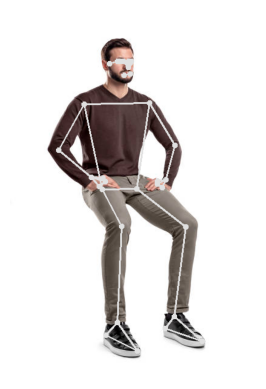

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
visualize_pose(result, output_path="visualize/mediapipe.jpg", plot=True)

## YOLO Pose Estimation

### Perform Pose Estimation
Run the YOLO model on the same example image.

In [7]:
result = estimate_pose(image_path, model="yolo", model_type="11n")

# Check the number of individuals detected
print(f"Number of individuals detected: {len(result.individuals)}")

Number of individuals detected: 1


YOLO produces 17 2D keypoints for each individual along with a confidence score (0-1):

In [8]:
# Print detailed information about each detected individual
for i, individual in enumerate(result.individuals):
    print(f"Individual {i+1}:")
    for landmark_name, landmark in individual.normalized_landmarks.items():
        print(f"  {landmark_name}: (x={round(landmark.x, 2)}, " \
              f"y={round(landmark.y, 2)}, " \
              f"confidence={round(landmark.confidence, 2)})")

Individual 1:
  Nose: (x=0.47, y=0.15, confidence=1.0)
  Left Eye: (x=0.49, y=0.14, confidence=0.97)
  Right Eye: (x=0.44, y=0.13, confidence=0.99)
  Left Ear: (x=0.5, y=0.15, confidence=0.49)
  Right Ear: (x=0.39, y=0.15, confidence=0.97)
  Left Shoulder: (x=0.56, y=0.25, confidence=1.0)
  Right Shoulder: (x=0.29, y=0.25, confidence=1.0)
  Left Elbow: (x=0.63, y=0.35, confidence=0.98)
  Right Elbow: (x=0.2, y=0.37, confidence=1.0)
  Left Wrist: (x=0.66, y=0.45, confidence=0.98)
  Right Wrist: (x=0.31, y=0.46, confidence=0.99)
  Left Hip: (x=0.54, y=0.46, confidence=1.0)
  Right Hip: (x=0.35, y=0.47, confidence=1.0)
  Left Knee: (x=0.7, y=0.57, confidence=1.0)
  Right Knee: (x=0.46, y=0.59, confidence=1.0)
  Left Ankle: (x=0.68, y=0.81, confidence=0.99)
  Right Ankle: (x=0.43, y=0.83, confidence=0.99)


### Visualize Results
Plot the YOLO-estimated poses on the image.

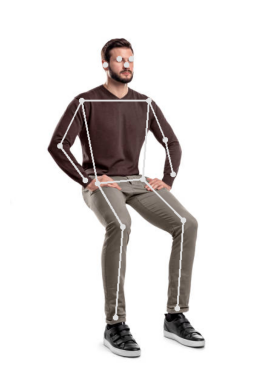

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [9]:
visualize_pose(result, output_path="visualize/yolo.jpg", plot=True)

## Extended Cases

### Estimating Poses in Multiple-Person Images

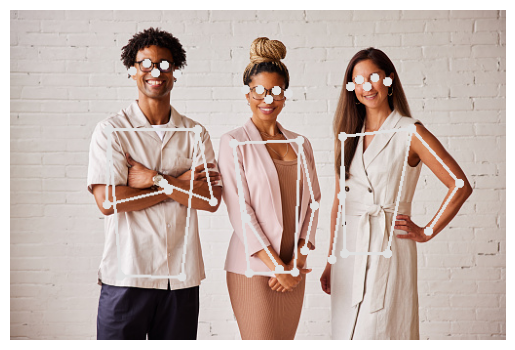

array([[[186, 176, 174],
        [187, 177, 175],
        [187, 177, 176],
        ...,
        [165, 145, 138],
        [163, 143, 136],
        [163, 143, 136]],

       [[192, 182, 180],
        [186, 176, 174],
        [190, 180, 179],
        ...,
        [165, 145, 138],
        [163, 143, 136],
        [163, 143, 136]],

       [[184, 174, 172],
        [187, 177, 175],
        [189, 179, 178],
        ...,
        [164, 145, 138],
        [163, 143, 136],
        [164, 144, 137]],

       ...,

       [[144, 121, 115],
        [146, 123, 115],
        [147, 124, 116],
        ...,
        [166, 141, 134],
        [169, 144, 137],
        [166, 143, 137]],

       [[150, 127, 119],
        [152, 129, 121],
        [155, 132, 124],
        ...,
        [162, 137, 130],
        [166, 141, 134],
        [164, 141, 135]],

       [[140, 117, 109],
        [143, 121, 110],
        [146, 124, 113],
        ...,
        [161, 136, 129],
        [165, 140, 133],
        [163, 140, 134]]

In [13]:
multi_person_image = "tutorial_images/three_people.jpg"
result = estimate_pose(multi_person_image, model="yolo", model_type="11n")
visualize_pose(result, "visualize/multi-person-yolo.jpg", plot=True)

You can specify the maximum number of individuals to detect using the num_individuals parameter (MediaPipe only):

Model already exists at src/senselab/video/tasks/pose_estimation/models/mediapipe/pose_landmarker_full.task


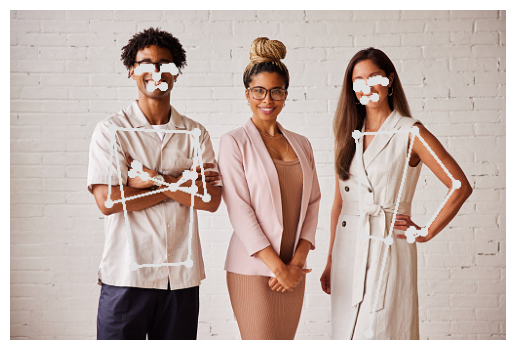

array([[[186, 176, 174],
        [187, 177, 175],
        [187, 177, 176],
        ...,
        [165, 145, 138],
        [163, 143, 136],
        [163, 143, 136]],

       [[192, 182, 180],
        [186, 176, 174],
        [190, 180, 179],
        ...,
        [165, 145, 138],
        [163, 143, 136],
        [163, 143, 136]],

       [[184, 174, 172],
        [187, 177, 175],
        [189, 179, 178],
        ...,
        [164, 145, 138],
        [163, 143, 136],
        [164, 144, 137]],

       ...,

       [[144, 121, 115],
        [146, 123, 115],
        [147, 124, 116],
        ...,
        [166, 141, 134],
        [169, 144, 137],
        [166, 143, 137]],

       [[150, 127, 119],
        [152, 129, 121],
        [155, 132, 124],
        ...,
        [162, 137, 130],
        [166, 141, 134],
        [164, 141, 135]],

       [[140, 117, 109],
        [143, 121, 110],
        [146, 124, 113],
        ...,
        [161, 136, 129],
        [165, 140, 133],
        [163, 140, 134]]

In [14]:
# num_individuals set to 2
result = estimate_pose(multi_person_image, model="mediapipe", model_type="full", num_individuals=2)
visualize_pose(result, "visualize/multi-person-mp.jpg", plot=True)

### Handling No Person Detected
If no person is detected in the image, the output will have zero individuals.

In [12]:
no_person_image = "tutorial_images/no_people.jpeg"
result = estimate_pose(no_person_image, model="mediapipe", model_type="full")

if len(result.individuals) == 0:
    print("No individuals detected in the image.")

Model already exists at src/senselab/video/tasks/pose_estimation/models/mediapipe/pose_landmarker_full.task
No individuals detected in the image.
